In [313]:
import pandas as pd
import numpy as nm
import seaborn as sns
import matplotlib.pyplot as plt


In [314]:
data = pd.read_csv('Residential_Average_Monthly_kWh_and_Bills.csv')

In [315]:
data

,Date,Average kWh,Fuel Charge (Cents/kWh),Average Bill
0,2000 Jan,820,1.372,54.26
1,2000 Feb,766,1.372,50.27
2,2000 Mar,707,1.372,45.91
3,2000 Apr,715,1.372,46.50
4,2000 May,838,1.372,61.68
...,...,...,...,...
226,2018 Nov,685,2.895,68.01
227,2018 Dec,663,2.895,65.67
228,2019 Jan,761,2.895,76.13
229,2019 Feb,707,2.895,70.38


In [316]:
data.describe()

,Average kWh,Fuel Charge (Cents/kWh),Average Bill
count,231.000000,231.000000,231.000000
mean,940.567100,3.032177,88.310996
std,263.778141,0.675461,32.533399
min,600.000000,1.372000,43.770000
25%,715.000000,2.783000,61.895000
50%,858.000000,3.105000,75.520000
75%,1175.000000,3.653000,114.110000
max,1565.000000,3.945000,172.650000


In [317]:
data.corr()

,Average kWh,Fuel Charge (Cents/kWh),Average Bill
Average kWh,1.000000,-0.041959,0.940085
Fuel Charge (Cents/kWh),-0.041959,1.000000,0.195224
Average Bill,0.940085,0.195224,1.000000


In [318]:
from datetime import datetime

In [319]:
data['Year'] = pd.to_datetime(data['Date'])

In [320]:
data['Year'] = data['Year'].dt.strftime('%Y')

<Axes: xlabel='Year'>

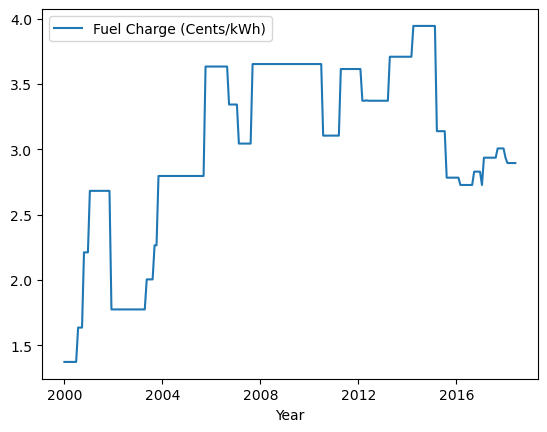

In [321]:
data.plot.line(x='Year', y='Fuel Charge (Cents/kWh)')

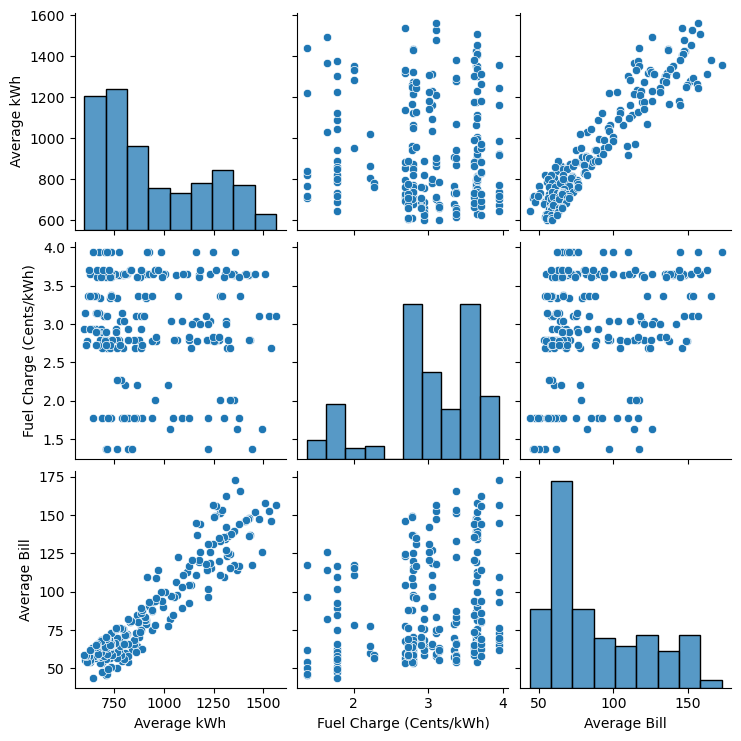

In [322]:
sns.pairplot(data)

<Axes: ylabel='Count'>

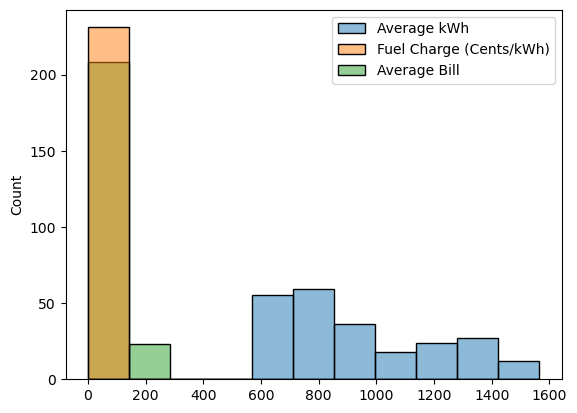

In [323]:
sns.histplot(data)

<Axes: xlabel='Average kWh', ylabel='Average Bill'>

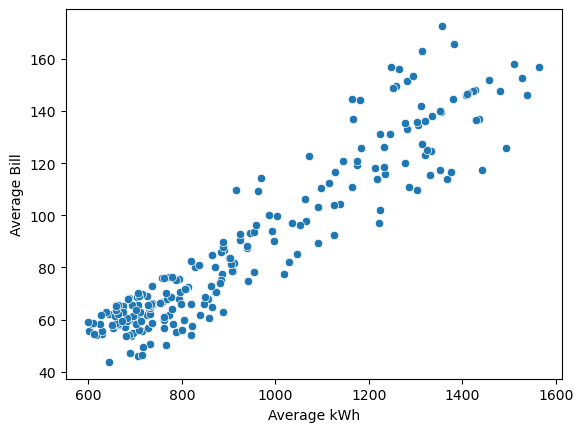

In [324]:
sns.scatterplot(data=data, x= 'Average kWh', y ='Average Bill')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '2000'),
  Text(1, 0, '2001'),
  Text(2, 0, '2002'),
  Text(3, 0, '2003'),
  Text(4, 0, '2004'),
  Text(5, 0, '2005'),
  Text(6, 0, '2006'),
  Text(7, 0, '2007'),
  Text(8, 0, '2008'),
  Text(9, 0, '2009'),
  Text(10, 0, '2010'),
  Text(11, 0, '2011'),
  Text(12, 0, '2012'),
  Text(13, 0, '2013'),
  Text(14, 0, '2014'),
  Text(15, 0, '2015'),
  Text(16, 0, '2016'),
  Text(17, 0, '2017'),
  Text(18, 0, '2018'),
  Text(19, 0, '2019')])

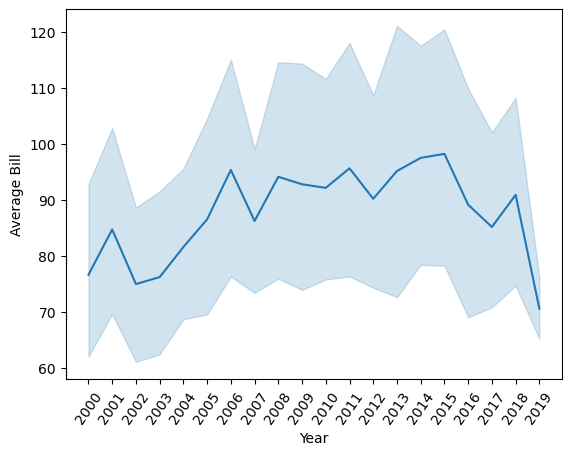

In [325]:
sns.lineplot(data=data,y='Average Bill', x='Year')
plt.xticks(rotation=55)

In [326]:
data.drop(columns='Date',axis=1, inplace=True)

In [327]:
X = data.drop(columns='Average Bill', axis=1)
X = X[:int(len(data)-1)]

In [328]:
y = data['Average Bill']
y =y[:int(len(data)-1)]

In [329]:
X

,Average kWh,Fuel Charge (Cents/kWh),Year
0,820,1.372,2000
1,766,1.372,2000
2,707,1.372,2000
3,715,1.372,2000
4,838,1.372,2000
...,...,...,...
225,819,2.936,2018
226,685,2.895,2018
227,663,2.895,2018
228,761,2.895,2019


In [330]:
y

0      54.26
1      50.27
2      45.91
3      46.50
4      61.68
       ...  
225    82.41
226    68.01
227    65.67
228    76.13
229    70.38
Name: Average Bill, Length: 230, dtype: float64

In [331]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [332]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [333]:
rf = RandomForestRegressor()

In [334]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [335]:
predition = rf.predict(X_test)

In [336]:
predition

array([ 73.0988, 125.0348,  83.9025,  62.2093,  58.828 , 135.0284,
        56.2047,  57.9942,  66.3426, 142.4287,  59.7137, 125.9673,
        85.4842,  87.7953, 135.8468, 132.059 ,  59.6941, 111.4749,
        75.0184,  68.4902,  85.4655, 148.0346,  72.6532,  92.2442,
       116.7378, 122.4812,  64.6632, 136.7571, 140.5621,  80.9552,
        95.9516,  66.9764,  59.1808,  81.7597,  61.9336, 141.8613,
        56.0489,  68.0616,  64.5901,  83.5126, 104.9394, 102.455 ,
        61.9333,  57.3984, 116.2997,  73.9314, 140.9024, 116.9715,
        85.7191, 115.7696,  78.0636,  62.2991,  62.3833, 144.8236,
        63.9823,  68.2358,  86.5249,  85.7587,  57.7333,  76.8682,
       121.3782,  91.9535, 135.2276,  59.0989,  96.4269,  95.9825,
        79.9472, 124.6516,  67.7741, 111.6482, 116.4687, 149.9181,
       151.647 , 132.6159, 103.7065,  64.6966])

In [337]:
error = y_test - predition

In [338]:
error

217     2.6812
66     11.9552
9      -1.9625
193    -0.2193
15     -1.9180
        ...   
114     8.0919
139     1.0830
186    12.1241
65      0.3735
142     0.5334
Name: Average Bill, Length: 76, dtype: float64

In [339]:
pred_data = pd.DataFrame({'Prediction':predition, 'Error Margin':error})

In [340]:
pred_data

,Prediction,Error Margin
217,73.0988,2.6812
66,125.0348,11.9552
9,83.9025,-1.9625
193,62.2093,-0.2193
15,58.8280,-1.9180
...,...,...
114,149.9181,8.0919
139,151.6470,1.0830
186,132.6159,12.1241
65,103.7065,0.3735


In [341]:
new_data = pd.concat([X_test, y_test,pred_data], axis=1)

In [342]:
new_data

,Average kWh,Fuel Charge (Cents/kWh),Year,Average Bill,Prediction,Error Margin
217,757,2.936,2018,75.78,73.0988,2.6812
66,1435,2.796,2005,136.99,125.0348,11.9552
9,1029,1.635,2000,81.94,83.9025,-1.9625
193,663,3.139,2016,61.99,62.2093,-0.2193
15,727,2.682,2001,56.91,58.8280,-1.9180
...,...,...,...,...,...,...
114,1511,3.653,2009,158.01,149.9181,8.0919
139,1527,3.105,2011,152.73,151.6470,1.0830
186,1164,3.945,2015,144.74,132.6159,12.1241
65,1125,2.796,2005,104.08,103.7065,0.3735


In [343]:
print('The model score is: ',rf.score(X_test,y_test))

The model score is:  0.9544600246811629


In [344]:
dt = data[['Average kWh', 'Fuel Charge (Cents/kWh)', 'Year']].tail(1)

In [345]:
dt

,Average kWh,Fuel Charge (Cents/kWh),Year
230,658,2.895,2019


In [346]:
preds = rf.predict(dt)

In [347]:
preds

array([64.7962])

In [348]:
print('The actual figure is: ',data[['Average Bill']].tail(1).values[0][0])
print('The predicted value is: ',preds)

The actual figure is:  65.13
The predicted value is:  [64.7962]


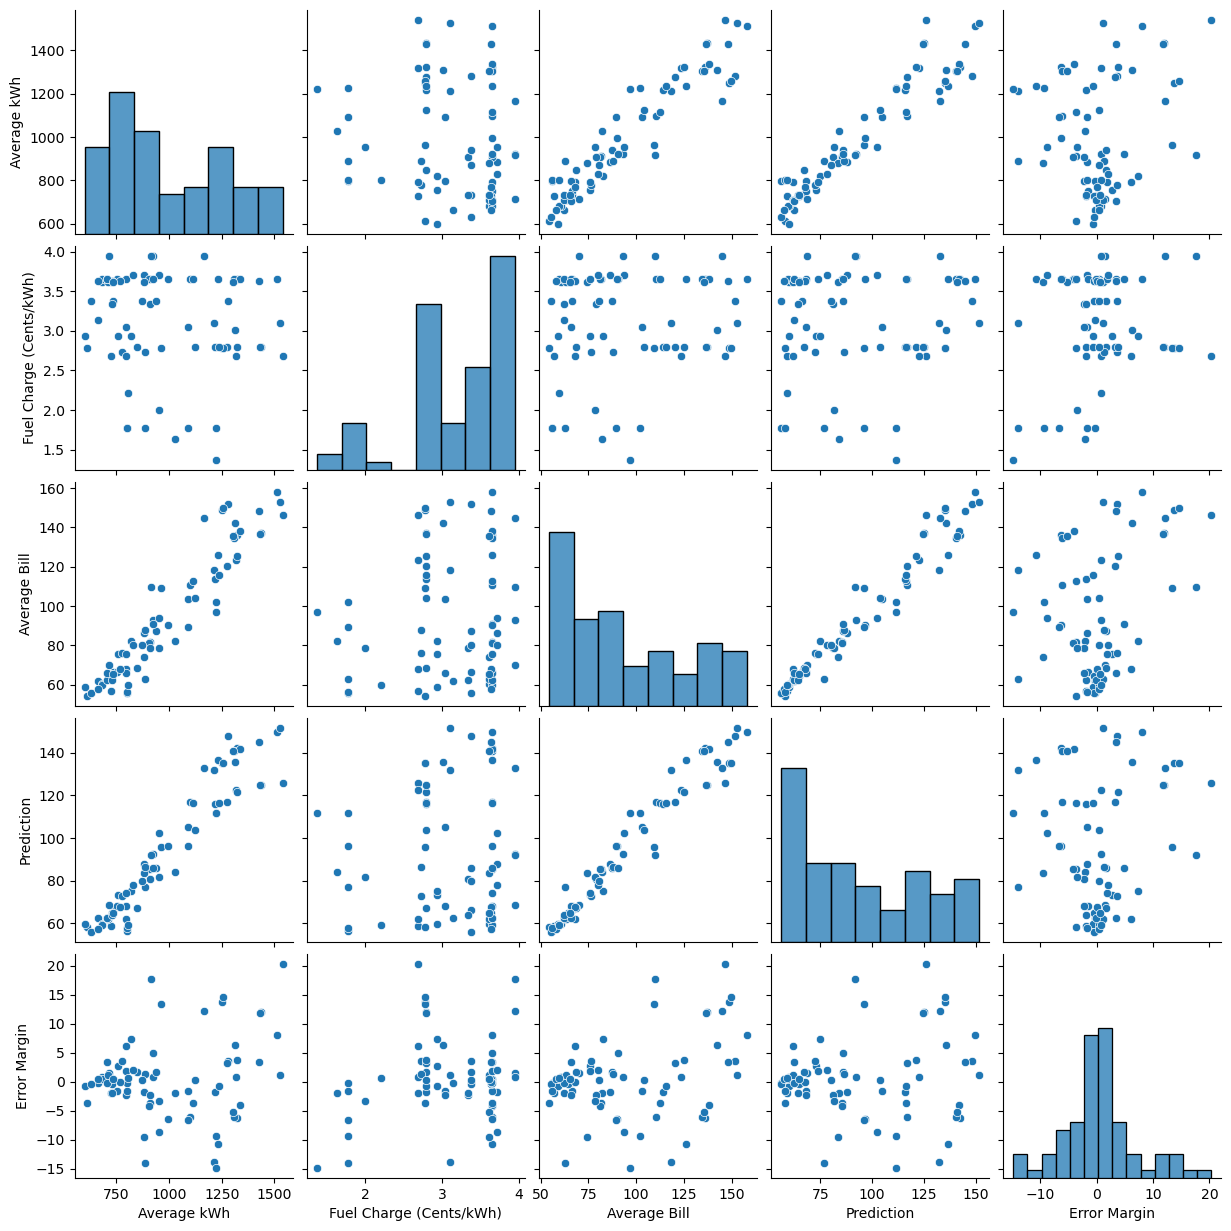

In [349]:
sns.pairplot(new_data)

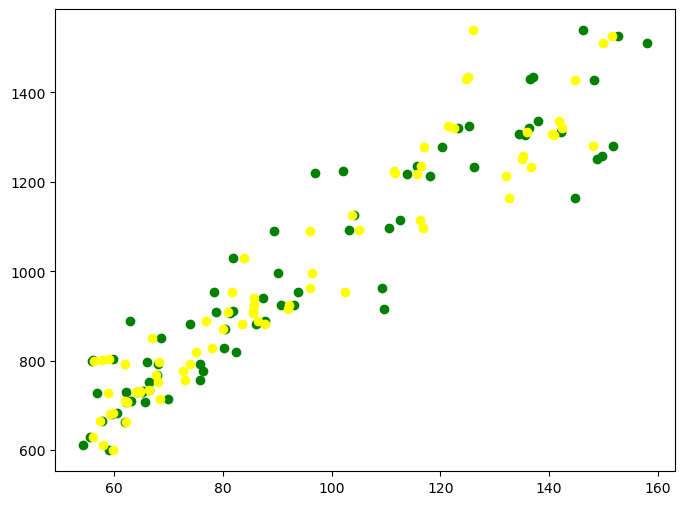

In [350]:
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
plt.scatter(data=new_data, x='Average Bill', y='Average kWh',c='green')
plt.scatter(data=new_data, x='Prediction', y='Average kWh',c='yellow')


In [351]:
from sklearn.linear_model import LinearRegression

In [352]:
lr = LinearRegression()

In [353]:
lr.fit(X_train,y_train)

LinearRegression()

In [354]:
model = lr.predict(X_test)

In [355]:
model

array([ 75.96504698, 141.81887375,  79.46185615,  63.79524363,
        51.43796427, 132.03329355,  55.02591542,  55.23758187,
        69.54307648, 139.60801592,  57.09661703, 149.02500322,
        88.07624167,  91.86576239, 143.02968768, 124.01908448,
        64.93080169, 106.10287546,  83.41627409,  74.41396157,
        88.60410148, 136.27024845,  75.93440709,  99.5318078 ,
       112.80763453, 122.70534616,  70.69949365, 126.77455021,
       135.54776923,  84.59247317,  97.42114181,  71.51294052,
        61.68353901,  76.35167569,  59.49009679, 141.41073215,
        58.03236378,  70.21639586,  63.93632826,  88.8468371 ,
       104.54600581, 100.39861924,  67.04692569,  56.1245579 ,
       113.72194771,  75.14382024, 139.56325389, 121.7014975 ,
        95.28849934, 115.73957886,  84.12703763,  64.80824715,
        65.81683129, 147.82272381,  63.2002405 ,  69.21276757,
        89.15432616,  90.76736096,  56.39504281,  65.72203176,
       128.4787736 ,  98.57035914, 132.87456113,  56.35

In [356]:
error1 = y_test - model

In [357]:
error1

217    -0.185047
66     -4.828874
9       2.478144
193    -1.805244
15      5.472036
         ...    
114    -3.303656
139    -9.025944
186    16.364732
65     -0.482738
142    -4.460910
Name: Average Bill, Length: 76, dtype: float64

In [358]:
model = pd.DataFrame({'Prediction':model,'Error':error})

In [359]:
model

,Prediction,Error
217,75.965047,2.6812
66,141.818874,11.9552
9,79.461856,-1.9625
193,63.795244,-0.2193
15,51.437964,-1.9180
...,...,...
114,161.313656,8.0919
139,161.755944,1.0830
186,128.375268,12.1241
65,104.562738,0.3735


In [360]:
new_data_lr = pd.concat([X_test, y_test,model], axis=1)

In [361]:
new_data_lr

,Average kWh,Fuel Charge (Cents/kWh),Year,Average Bill,Prediction,Error
217,757,2.936,2018,75.78,75.965047,2.6812
66,1435,2.796,2005,136.99,141.818874,11.9552
9,1029,1.635,2000,81.94,79.461856,-1.9625
193,663,3.139,2016,61.99,63.795244,-0.2193
15,727,2.682,2001,56.91,51.437964,-1.9180
...,...,...,...,...,...,...
114,1511,3.653,2009,158.01,161.313656,8.0919
139,1527,3.105,2011,152.73,161.755944,1.0830
186,1164,3.945,2015,144.74,128.375268,12.1241
65,1125,2.796,2005,104.08,104.562738,0.3735


In [362]:
print('The linear regression score is: ',lr.score(X_test,y_test))

The linear regression score is:  0.9647150420434719


In [363]:
dt_lr = data[['Average kWh', 'Fuel Charge (Cents/kWh)', 'Year']].tail(1)

In [364]:
dt_lr

,Average kWh,Fuel Charge (Cents/kWh),Year
230,658,2.895,2019


In [365]:
lr_pred = lr.predict(dt_lr)

In [366]:
lr_pred

array([64.9162067])

In [367]:
print('The actual value is: ',data[['Average Bill']].tail(1).values[0][0])
print('The predicted value using linear regression is: ',lr_pred)

The actual value is:  65.13
The predicted value using linear regression is:  [64.9162067]


In [368]:
from sklearn.metrics import classification_report,confusion_matrix

In [369]:
# The columns had the same names and hence hard to know random forest preds from linear regression
pred_data.rename(columns={'Prediction':'Random Forest'},inplace=True)

In [370]:
rand_forest = pred_data['Random Forest']

In [371]:
rand_forest

217     73.0988
66     125.0348
9       83.9025
193     62.2093
15      58.8280
         ...   
114    149.9181
139    151.6470
186    132.6159
65     103.7065
142     64.6966
Name: Random Forest, Length: 76, dtype: float64

In [372]:
model.rename(columns={'Prediction':'Linear Regression'}, inplace=True)

In [373]:
linear_regression= model['Linear Regression']

In [374]:
linear_regression

217     75.965047
66     141.818874
9       79.461856
193     63.795244
15      51.437964
          ...    
114    161.313656
139    161.755944
186    128.375268
65     104.562738
142     69.690910
Name: Linear Regression, Length: 76, dtype: float64

In [375]:
best_model = pd.concat([y_test,rand_forest,linear_regression], axis=1)

In [376]:
best_model

,Average Bill,Random Forest,Linear Regression
217,75.78,73.0988,75.965047
66,136.99,125.0348,141.818874
9,81.94,83.9025,79.461856
193,61.99,62.2093,63.795244
15,56.91,58.8280,51.437964
...,...,...,...
114,158.01,149.9181,161.313656
139,152.73,151.6470,161.755944
186,144.74,132.6159,128.375268
65,104.08,103.7065,104.562738


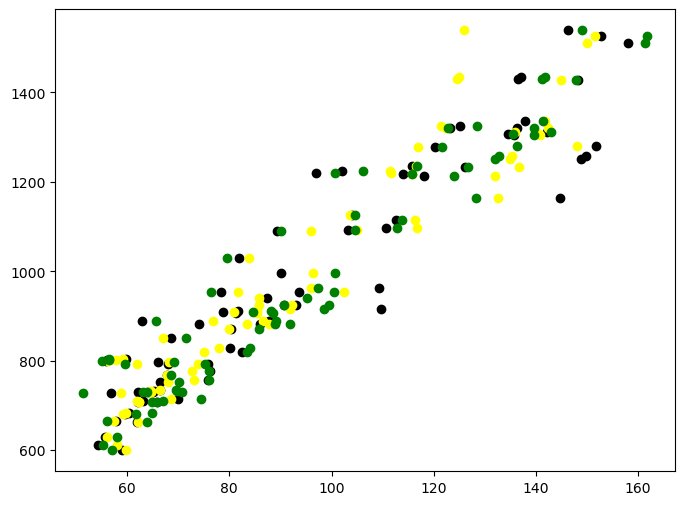

In [377]:
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
plt.scatter(data=new_data, x='Average Bill', y='Average kWh',c='black')
plt.scatter(data=new_data, x='Prediction', y='Average kWh',c='yellow')
plt.scatter(data=new_data_lr, x='Prediction', y='Average kWh',c='green')